## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [65]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import aplpy
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

FA_radeg = 50.673825
FA_decdeg = -37.208227

BeamRa = 51.299614
BeamDec = -37.707858

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'contFigs/'

outSynPlot = figDir+'lobesSynF8.png'
synMap = rootDir+'synMaps/JP_synage::JP_Shape.break_frequency.FITS'


print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+



	-----> Loaded <-----


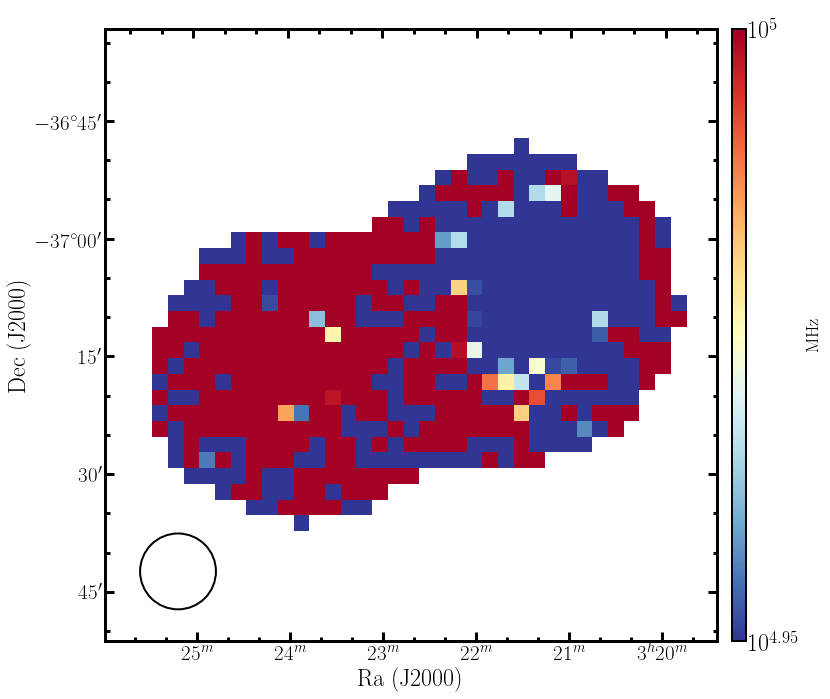

In [81]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#


params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 24,
          'ytick.labelsize'     : 24, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=synMap

fig = plt.figure(figsize=(12, 12))

f4 = aplpy.FITSFigure(a, figure=fig, subplot=(1,1,1))
f4.show_colorscale(aspect='equal', cmap='RdYlBu_r',stretch = 'log',
                    exponent=1,vmin=9e4,vmax=1.e5)
f4.frame.set_linewidth(3)
f4.recenter(FA_radeg,FA_decdeg,width=1.3,height=1.3)

#f4.set_title('Break frequency map')

f4.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21) 
f4.axis_labels.set_font( weight='medium', \
                        stretch='semi-expanded', family='serif', \
                         style='normal', variant='normal',size=24)

f4.tick_labels.set_xformat('hh:mm')

f4.tick_labels.set_yformat('dd:mm')

f4.axis_labels.set_xtext('Ra (J2000)')
f4.axis_labels.set_ytext('Dec (J2000)')

f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()


f4.add_colorbar(log_format=True)
#f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
f4.colorbar.set_ticks([90000,1e5])
f4.colorbar.set_frame_linewidth(1)
f4.colorbar.set_pad(0.2)
f4.colorbar.set_font( weight='medium', \
                      stretch='semi-expanded', family='serif', \
                      style='normal', variant='normal',size=24)

f4.colorbar.set_axis_label_text(r'MHz')

f4.show_ellipses(BeamRa, BeamDec, 580./3600., 580./3600., angle=0, edgecolor='black',linewidth=2)

fig.tight_layout()

fig.savefig(outSynPlot,format='png',overwrite=True)


print '\n\t-----> Loaded <-----'